In [1]:
import wandb
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json

api = wandb.Api()

# NO REHERSAL

In [7]:
runs = api.runs("qba/rehersal Alexnet MNIST Task IL")

In [25]:
for i in range(len(runs)):
    meta = json.load(runs[i].file("wandb-metadata.json").download(exist_ok=True))
    print(meta['args'])

['rehearsal_dataset=dead_leaves-textures']
['rehearsal_dataset=dead_leaves-textures']
['rehearsal_dataset=dead_leaves-textures']
['rehearsal_dataset=dead_leaves-textures']
['rehearsal_dataset=dead_leaves-textures']
['rehearsal_dataset=dead_leaves-textures']
['rehearsal_dataset=dead_leaves-textures']
['rehearsal_dataset=dead_leaves-textures']
['rehearsal_dataset=dead_leaves-textures']
['rehearsal_dataset=dead_leaves-textures']
['rehearsal_dataset=dead_leaves-textures']
['rehearsal_dataset=dead_leaves-textures']
['rehearsal_dataset=dead_leaves-textures']
['rehearsal_dataset=dead_leaves-textures']
['rehearsal_dataset=dead_leaves-textures']
['rehearsal_dataset=dead_leaves-textures']
['rehearsal_dataset=dead_leaves-textures']
['rehearsal_dataset=dead_leaves-textures']
['rehearsal_dataset=dead_leaves-textures']
['rehearsal_dataset=dead_leaves-textures']
['rehearsal_dataset=dead_leaves-textures']
['rehearsal_dataset=dead_leaves-textures']
['rehearsal_dataset=dead_leaves-textures']
['rehearsal

In [15]:
meta['args']

['rehearsal_dataset=dead_leaves-textures']

In [9]:
runs_list = []

for run in runs:
    runs_list.append(run.config)

df = pd.DataFrame(runs_list)

In [10]:
df

,setup,epochs,dataset,architecture,learning_rate
0,task IL,5,CIFAR10,SmallAlexNetTasklIL,0.01
1,task IL,5,CIFAR10,SmallAlexNetTasklIL,0.01
2,task IL,5,CIFAR10,SmallAlexNetTasklIL,0.01
3,task IL,5,CIFAR10,SmallAlexNetTasklIL,0.01
4,task IL,5,CIFAR10,SmallAlexNetTasklIL,0.01
5,task IL,5,CIFAR10,SmallAlexNetTasklIL,0.01
6,task IL,5,CIFAR10,SmallAlexNetTasklIL,0.01
7,task IL,5,CIFAR10,SmallAlexNetTasklIL,0.01
8,task IL,5,CIFAR10,SmallAlexNetTasklIL,0.01
9,task IL,5,CIFAR10,SmallAlexNetTasklIL,0.01


In [7]:
noise_rehersal_runs = [
'lunar-feather-35',
'zesty-pond-34',
'comic-wildflower-33',
'ruby-shape-32',
]

acc_col = ['acc_task_0', 'acc_task_1', 'acc_task_2', 'acc_task_3', 'acc_task_4']
cols = ['acc_task_0', 'acc_task_1', 'acc_task_2', 'acc_task_3', 'acc_task_4', '_step']

In [17]:
# dfs = {}

# for i in range(len(runs)):
#     print(f"{runs[i].name}")
#     dfs[i] = runs[i].history(samples=10000)
#     print(len(dfs[i][cols].dropna().sort_values(by='_step').set_index('_step')))

In [9]:
dfs = {}

for i in range(len(runs)):
    print(f"{runs[i].name}")
    if runs[i].name in noise_rehersal_runs:
        dfs[i] = runs[i].history(samples=10000)
        print(len(dfs[i][cols].dropna().sort_values(by='_step').set_index('_step')))

skilled-dust-36
lunar-feather-35
225
zesty-pond-34
225
comic-wildflower-33
225
ruby-shape-32
225
lively-plant-27
worldly-shape-26
neat-valley-25
glamorous-elevator-24
deep-yogurt-23
feasible-wave-22
distinctive-frost-20
fallen-eon-19
bright-mountain-18
bright-resonance-17
prime-monkey-16
tough-dawn-15
brisk-bird-14
elated-wood-13
dutiful-snowball-12
cerulean-bird-11
proud-sun-3
playful-capybara-2
lyric-snowflake-1


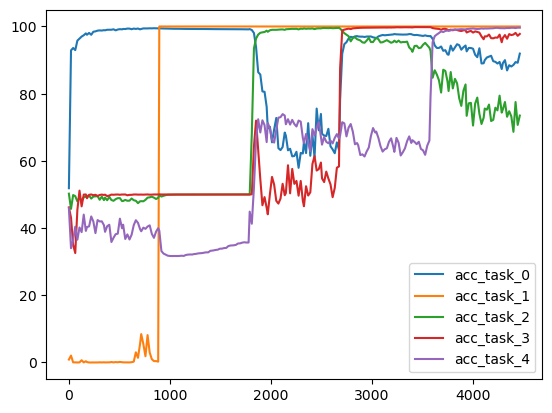

In [12]:
df = dfs[1]

for i in range(len(acc_col)):
    plt.plot(df[[acc_col[i],'_step']].dropna().sort_values(by='_step').set_index('_step'))

plt.legend(acc_col)
plt.show()

<Axes: xlabel='index'>

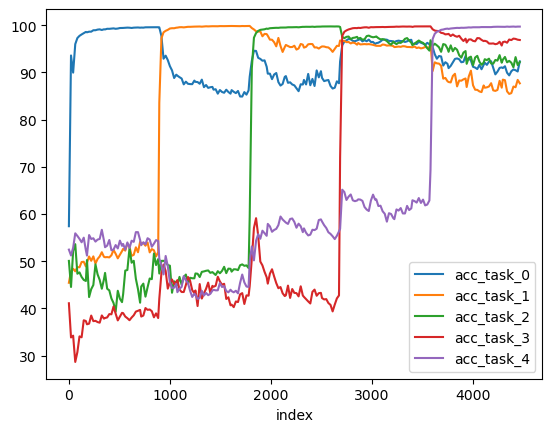

In [14]:
df_all_runs = pd.DataFrame()

for i in dfs.keys():
    df_all_runs = pd.concat([df_all_runs, dfs[i][acc_col].dropna()])

df_all_runs.reset_index().groupby("index").mean().plot()

# REHERSAL

In [15]:
runs = api.runs("qba/rehersal small net MNIST Task IL")

In [20]:
noise_rehersal_runs = [
'vibrant-sunset-34',
'eager-smoke-33',
'magic-glade-32'
]

acc_col = ['acc_task_0', 'acc_task_1', 'acc_task_2', 'acc_task_3', 'acc_task_4']
cols = ['acc_task_0', 'acc_task_1', 'acc_task_2', 'acc_task_3', 'acc_task_4', '_step']

In [31]:
dfs_rehersal = {}

for i in range(len(runs)):
    print(f"{runs[i].name}")
    if runs[i].name in noise_rehersal_runs:
        dfs_rehersal[i] = runs[i].history(samples=10000)
        print(len(dfs[i][cols].dropna().sort_values(by='_step').set_index('_step')))

scarlet-galaxy-35
vibrant-sunset-34
225
eager-smoke-33
225
magic-glade-32
225
peach-wood-31
woven-voice-30
dazzling-haze-29
cosmic-dawn-28
glamorous-cherry-22
graceful-sun-21
blooming-sponge-20
fearless-frost-19
eager-rain-18
lyric-snow-17
leafy-serenity-16
clear-dragon-15
fragrant-frog-14
helpful-sky-13
comfy-oath-12
graceful-plasma-11
absurd-dew-10
restful-snow-9
fearless-breeze-8
daily-plant-7
leafy-disco-6
apricot-glitter-5
iconic-firefly-4
warm-meadow-3


# Single run

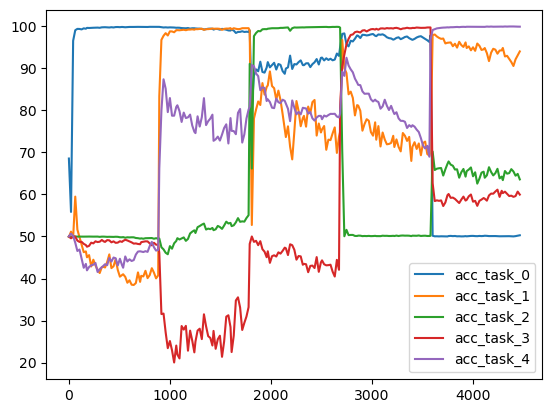

In [32]:
df = dfs_rehersal[1]

for i in range(len(acc_col)):
    plt.plot(df[[acc_col[i],'_step']].dropna().sort_values(by='_step').set_index('_step'))

plt.legend(acc_col)
plt.show()

# All runs mean

<Axes: xlabel='index'>

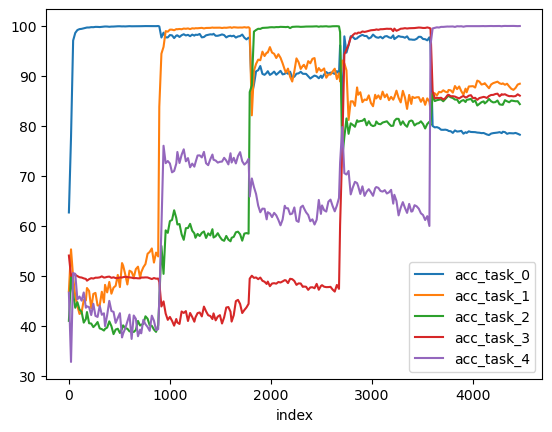

In [33]:
df_all_runs_rehersal = pd.DataFrame()

for i in dfs_rehersal.keys():
    df_all_runs_rehersal = pd.concat([df_all_runs_rehersal, dfs_rehersal[i][acc_col].dropna()])

df_all_runs_rehersal.reset_index().groupby("index").mean().plot()

# Comparison

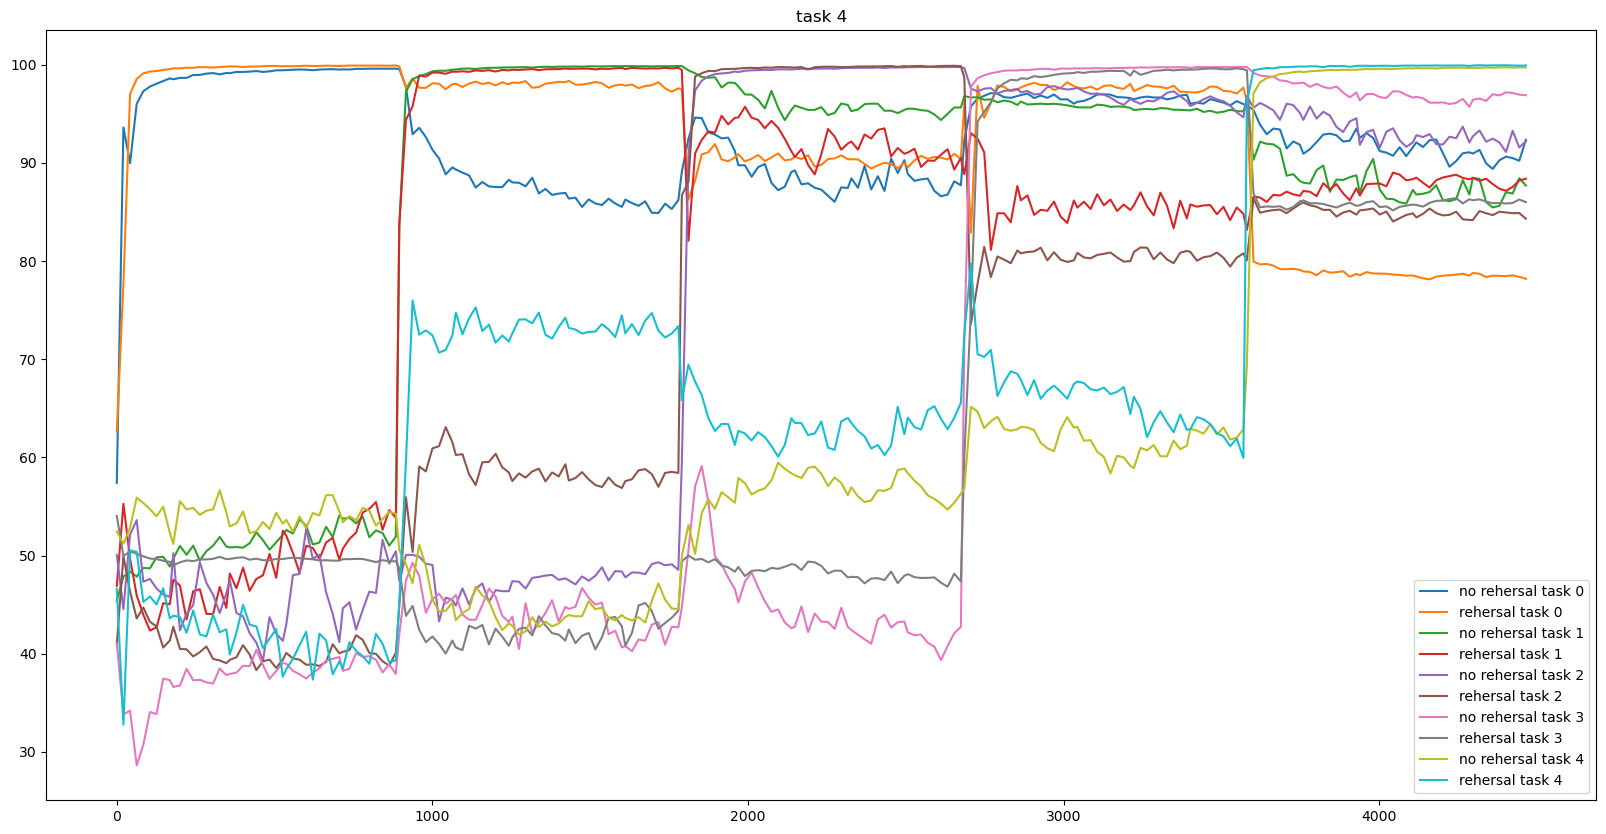

In [34]:
plt.figure(figsize=(20,10))
legend = []

for task_num in range(5):
    plt.plot(df_all_runs.reset_index().groupby("index").mean()[acc_col[task_num]])
    plt.plot(df_all_runs_rehersal.reset_index().groupby("index").mean()[acc_col[task_num]])
    legend.extend(([f"no rehersal task {task_num}", f"rehersal task {task_num}"]))
    plt.title(f"task {task_num}")
plt.legend(legend)
plt.show()

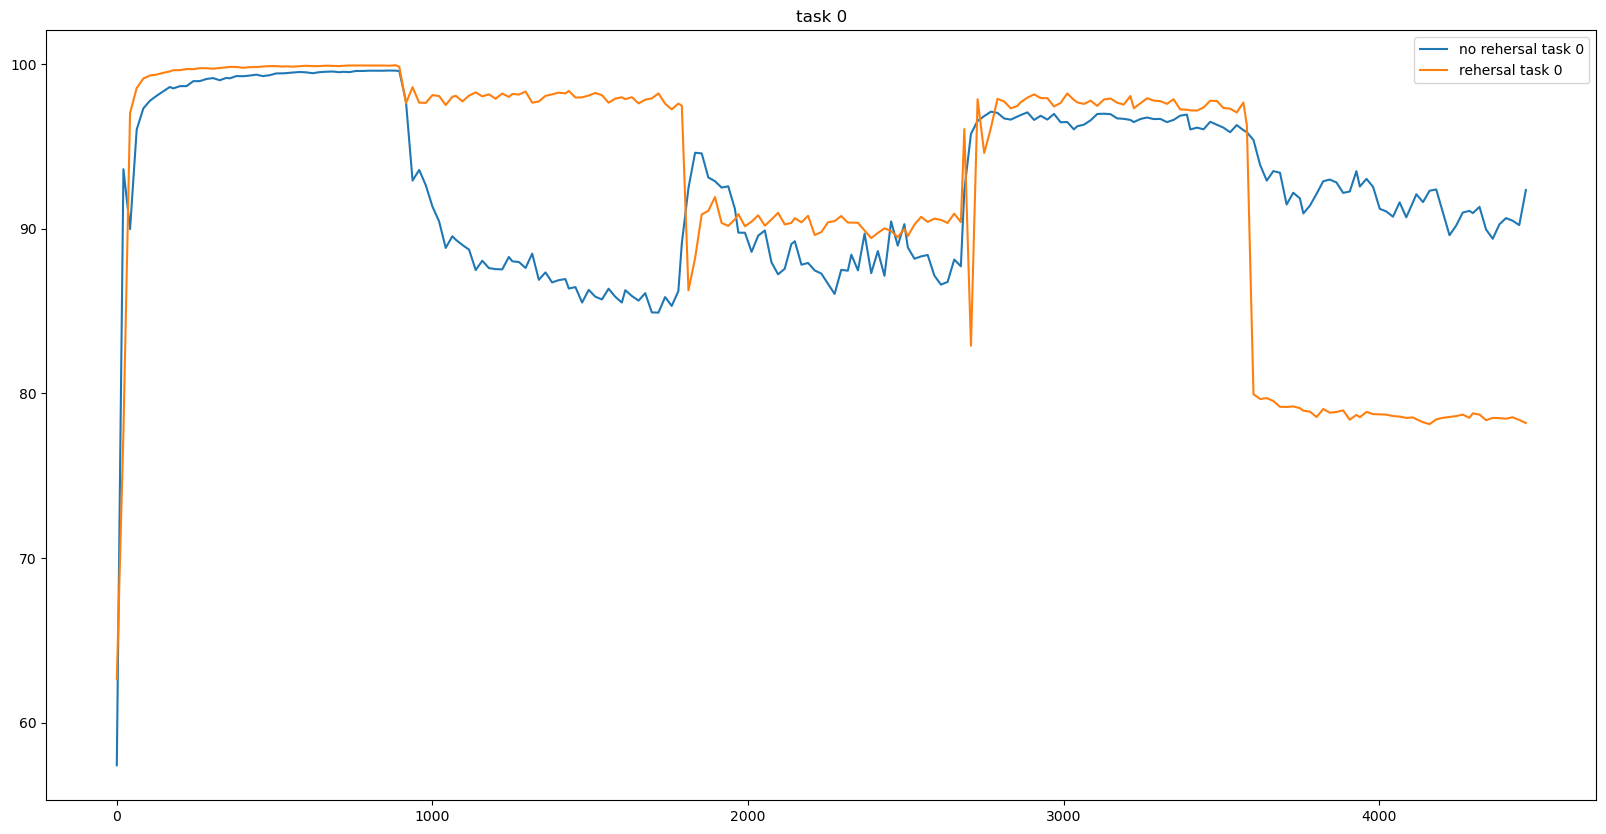

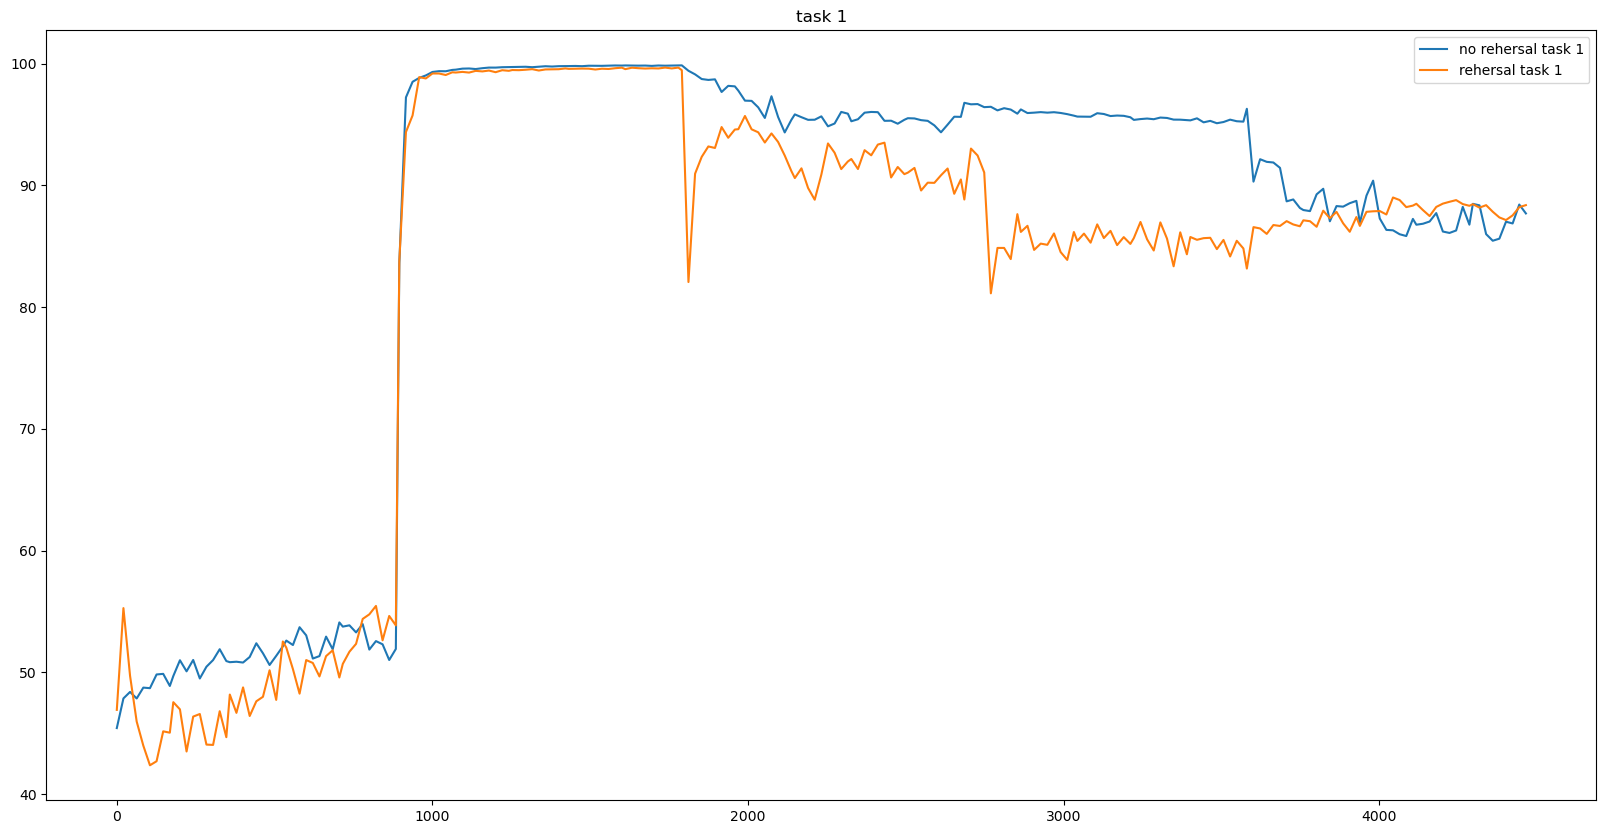

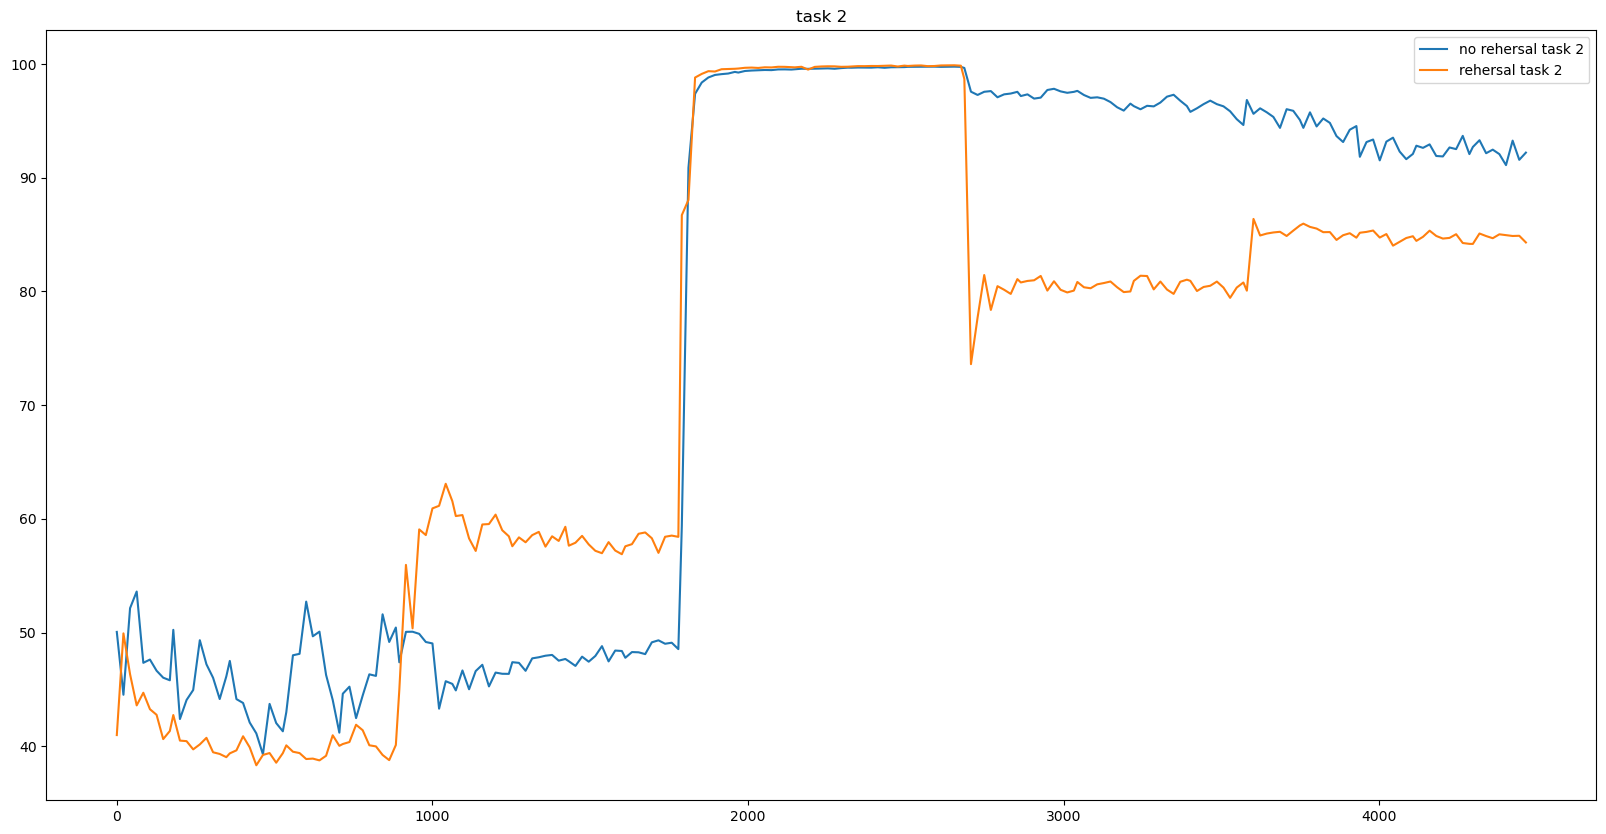

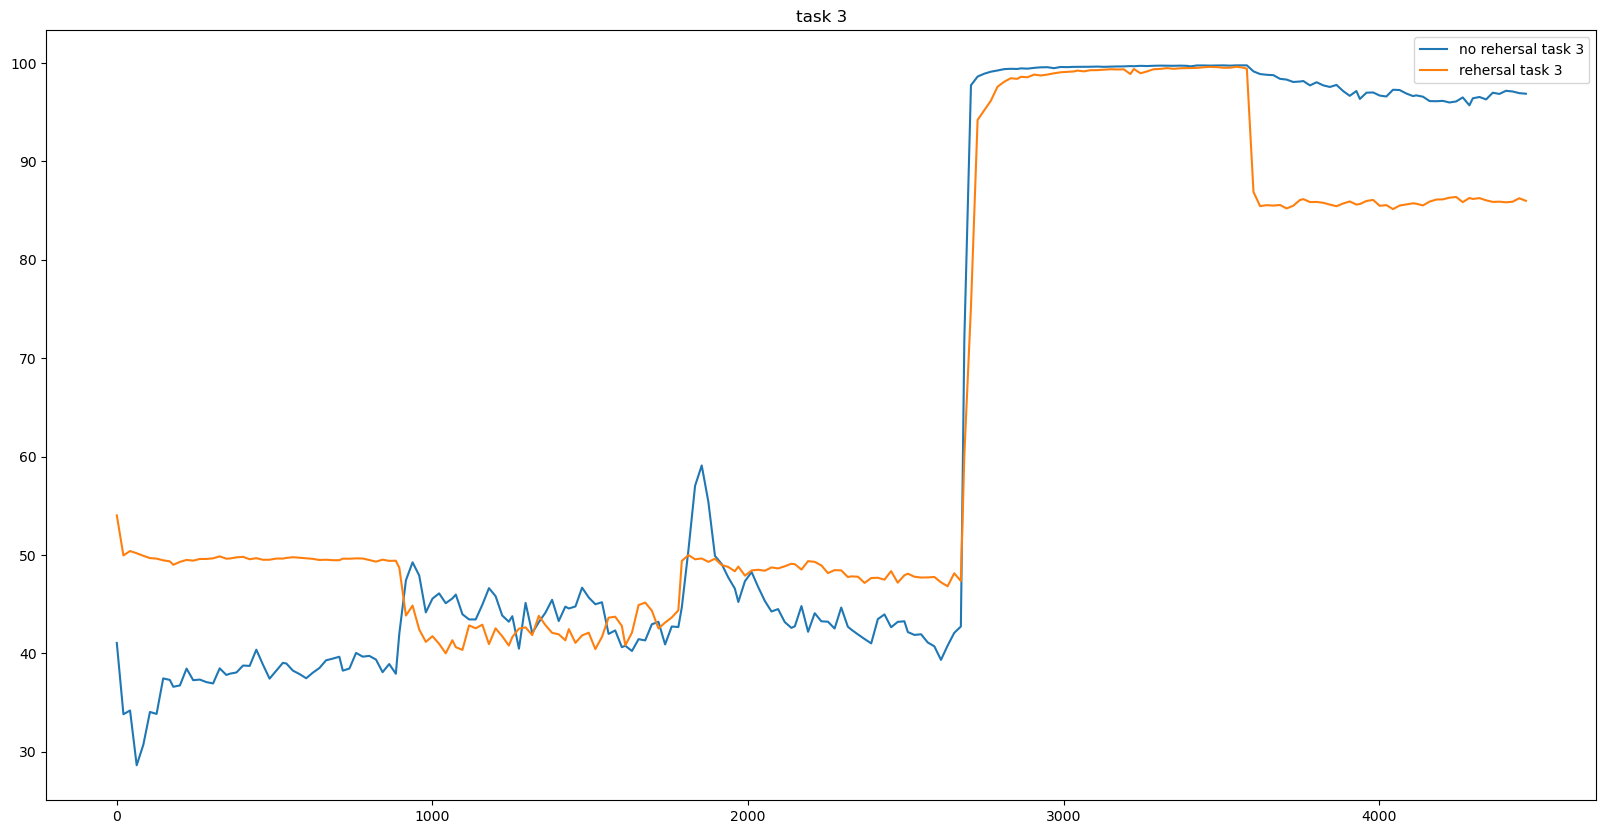

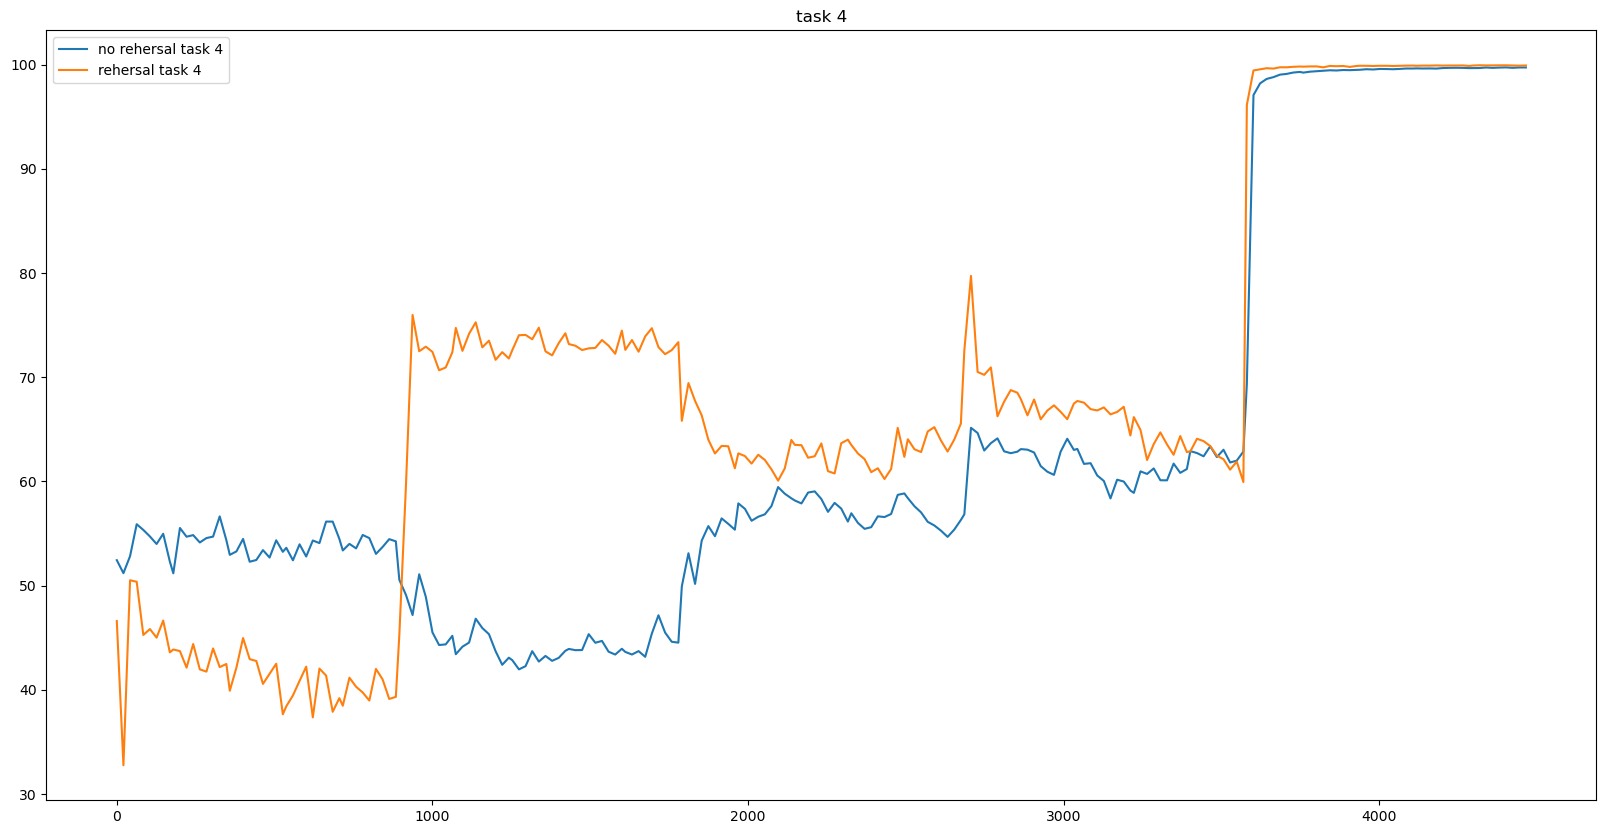

In [35]:
for task_num in range(5):
    plt.figure(figsize=(20,10))
    plt.plot(df_all_runs.reset_index().groupby("index").mean()[acc_col[task_num]])
    plt.plot(df_all_runs_rehersal.reset_index().groupby("index").mean()[acc_col[task_num]])
    plt.legend([f"no rehersal task {task_num}", f"rehersal task {task_num}"])
    plt.title(f"task {task_num}")
    plt.show()